<a href="https://colab.research.google.com/github/L120Git/Deep_Learning_Airbnb/blob/main/Deep_Learning_LauraCasta%C3%B1o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q keras

In [2]:
import numpy as np
import pandas as pd
#para representar la matriz de correlación
import seaborn as sns
#para descargar las imagenes
import imageio as io
import cv2
#para representar gráficas
import matplotlib.pyplot as plt

#para preprocesar
from sklearn import preprocessing
#para dividir los datos
from sklearn.model_selection import train_test_split
#para entrar redes
import tensorflow as tf
from tensorflow import keras
#convertir un vector en una matriz binaria
from keras.utils import to_categorical #no lo uso
#para evaluar
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Nos descargamos el dataset de OpenDataSoft
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2023-03-13 09:29:10--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.249.199.226, 34.248.20.69
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.249.199.226|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [        <=>         ]  54.31M   915KB/s    in 63s     

2023-03-13 09:30:18 (889 KB/s) - ‘airbnb-listings.csv’ saved [56950929]



In [4]:
# Leemos el dataset con pandas y mostramos los 5 primeros registros
data = pd.read_csv('airbnb-listings.csv', sep = ';')
data.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,3150371,https://www.airbnb.com/rooms/3150371,20170407214119,2017-04-08,Double room + bathroom - La Latina,"Double room with own bathroom in La Latina, in...",The apartment is spacious and cozy. It is 90 m...,"Double room with own bathroom in La Latina, in...",none,La Latina is one of the most famous neighbourh...,...,10.0,10.0,10.0,NaN,NaN,flexible,1,2.33,"40.41010608050749,-3.714754034177323","Host Has Profile Pic,Host Identity Verified,Is..."
1,3378181,https://www.airbnb.com/rooms/3378181,20170407214119,2017-04-08,"Ópera/Plz Mayor -- A/C, elevator",Old world charm meets modern comfort in our ne...,"Designed with the traveler in mind, our one-be...",Old world charm meets modern comfort in our ne...,none,The neighborhood is steeped in history and clo...,...,10.0,10.0,10.0,NaN,NaN,strict,2,2.69,"40.416968822636726,-3.7094389211089993","Host Has Profile Pic,Host Identity Verified,Is..."
2,2070750,https://www.airbnb.com/rooms/2070750,20170407214119,2017-04-08,Centric room with a balcony,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,none,-,...,9.0,10.0,9.0,NaN,NaN,flexible,4,0.60,"40.40970517560235,-3.7135611928841086","Host Has Profile Pic,Host Identity Verified,Is..."
3,9832499,https://www.airbnb.com/rooms/9832499,20170407214119,2017-04-08,PLAZA DE ESPAÑA - Único - Gimnasio.,"Ubicado en el famoso edificio Torre de Madrid,...","Ubicado en el famoso edificio Torre de Madrid,...","Ubicado en el famoso edificio Torre de Madrid,...",none,NaN,...,10.0,10.0,10.0,VT-1520,NaN,strict,9,3.56,"40.42319271738103,-3.7112486513892","Host Is Superhost,Host Has Profile Pic,Host Id..."
4,1868170,https://www.airbnb.com/rooms/1868170,20170407214119,2017-04-08,"Loft/duplex 150m2, 3 double rooms","Huge, open plan spacious apartment in the cent...","Huge, open plan spacious apartment in the cent...","Huge, open plan spacious apartment in the cent...",none,NaN,...,10.0,10.0,9.0,NaN,NaN,moderate,1,1.13,"40.416513932601625,-3.7178427529546973","Host Is Superhost,Host Has Profile Pic,Host Id..."


In [5]:
# vamos a ver de cuantos registros disponemos y de cuantas variables
data.shape

(14001, 89)

In [6]:
# ¿De qué variables disponemos?
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

Voy a filtrar por Madrid el dataset porque he observado errores en 'City'


In [7]:
#observo si hay filas que no pertenecen a Madrid
print(f'Hay', (data['City'] != 'Madrid').sum(), 'filas que no son de Madrid')

Hay 794 filas que no son de Madrid


In [8]:
#elimino esas filas
data_mad = data.loc[data['City']=='Madrid']
#compruebo que las he eliminado
(data_mad['City'] != 'Madrid').sum()

0

In [9]:
# vamos a ver las medidas del data_mad
data_mad.shape

(13207, 89)

In [10]:
#reseteo los indices para que no haya problemas después al descargar las imagenes
data_mad = data_mad.reset_index()

Cargamos las imágenes del entrenamiento en un array para tenerlas disponibles luego

In [11]:
# montamos GDrive para almacenar las imagenes que descarguemos
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
n_images = 1000
images = np.zeros((n_images, 224, 224, 3), dtype=np.uint8)
urls = data_mad['Thumbnail Url']

i_aux = 0
good_urls = []
for i_img, url in enumerate(urls):
    if len(good_urls) >= n_images:
        # ya tenemos n_images imágenes
        break
    try:
        img = io.imread(url)
        images_aux = cv2.resize(img, (224, 224))
        if images_aux.shape == (224, 224, 3):
          images[i_aux]=images_aux
          good_urls.append(i_img)
          i_aux += 1
          print(f'Imagen {i_img} descargada')
          print(len(good_urls))
        else:
          pass
    except IOError as err:
        pass

Imagen 0 descargada
1
Imagen 1 descargada
2
Imagen 2 descargada
3
Imagen 3 descargada
4
Imagen 4 descargada
5
Imagen 5 descargada
6
Imagen 7 descargada
7
Imagen 8 descargada
8
Imagen 10 descargada
9
Imagen 11 descargada
10
Imagen 12 descargada
11
Imagen 13 descargada
12
Imagen 14 descargada
13
Imagen 15 descargada
14
Imagen 16 descargada
15
Imagen 18 descargada
16
Imagen 19 descargada
17
Imagen 20 descargada
18
Imagen 21 descargada
19
Imagen 24 descargada
20
Imagen 25 descargada
21
Imagen 27 descargada
22
Imagen 33 descargada
23
Imagen 35 descargada
24
Imagen 36 descargada
25
Imagen 37 descargada
26
Imagen 41 descargada
27
Imagen 42 descargada
28
Imagen 44 descargada
29
Imagen 47 descargada
30
Imagen 48 descargada
31
Imagen 49 descargada
32
Imagen 51 descargada
33
Imagen 54 descargada
34
Imagen 57 descargada
35
Imagen 59 descargada
36
Imagen 61 descargada
37
Imagen 62 descargada
38
Imagen 64 descargada
39
Imagen 67 descargada
40
Imagen 69 descargada
41
Imagen 70 descargada
42
Imagen 72

In [13]:
# Visualizamos las imágenes cargadas
print(images.shape)

(1000, 224, 224, 3)


In [14]:
# Mantenemos los datos numéricos solo para aquellos pisos que tienen imágenes 
# y las hemos obtenido
final_data = data_mad.iloc[good_urls, :]

In [15]:
print(final_data.shape)

(1000, 90)


In [16]:
# guardamos las imágenes (y yo os recomiendo que os lo guardéis en GDrive para evitar tener que repetir esto)
np.save('images.npy', images)
np.save('final_data.npy', final_data)
np.save('good_url.npy', good_urls)

In [17]:
# almacenamos las imagenes en nuestro drive
!cp images.npy /content/drive/MyDrive/DL/images.npy
!cp final_data.npy /content/drive/MyDrive/DL/final_data.npy
!cp good_url.npy /content/drive/MyDrive/DL/good_url.npy


In [18]:
!ls -lah images.npy final_data.npy good_url.npy

-rw-r--r-- 1 root root 3.8M Mar 13 09:45 final_data.npy
-rw-r--r-- 1 root root 8.0K Mar 13 09:45 good_url.npy
-rw-r--r-- 1 root root 144M Mar 13 09:45 images.npy


In [19]:
#Elimino del dataset la variable de las urls porque ya no la necesito

final_data = final_data.drop(['Thumbnail Url'], axis=1)
final_data.head(3)

,index,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,0,3150371,https://www.airbnb.com/rooms/3150371,20170407214119,2017-04-08,Double room + bathroom - La Latina,"Double room with own bathroom in La Latina, in...",The apartment is spacious and cozy. It is 90 m...,"Double room with own bathroom in La Latina, in...",none,...,10.0,10.0,10.0,NaN,NaN,flexible,1,2.33,"40.41010608050749,-3.714754034177323","Host Has Profile Pic,Host Identity Verified,Is..."
1,1,3378181,https://www.airbnb.com/rooms/3378181,20170407214119,2017-04-08,"Ópera/Plz Mayor -- A/C, elevator",Old world charm meets modern comfort in our ne...,"Designed with the traveler in mind, our one-be...",Old world charm meets modern comfort in our ne...,none,...,10.0,10.0,10.0,NaN,NaN,strict,2,2.69,"40.416968822636726,-3.7094389211089993","Host Has Profile Pic,Host Identity Verified,Is..."
2,2,2070750,https://www.airbnb.com/rooms/2070750,20170407214119,2017-04-08,Centric room with a balcony,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,Lominous room for rent in the heart of the old...,none,...,9.0,10.0,9.0,NaN,NaN,flexible,4,0.60,"40.40970517560235,-3.7135611928841086","Host Has Profile Pic,Host Identity Verified,Is..."


### División de los datos

In [20]:
#Divido entre train y test
train, test = train_test_split(final_data, test_size=0.2, shuffle=True, random_state=42)
print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

#guardo los CSV en local
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de training: (800, 89)
Dimensiones del dataset de test: (200, 89)


In [21]:
#compruebo que tengo los indices originales
train.head()

,index,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
47,47,13464977,https://www.airbnb.com/rooms/13464977,20170407214119,2017-04-08,Lovely apartment next to the Royale Palace,"Nice, modern apartment at the heart of the cen...",I provide all you can need at the apartartment...,"Nice, modern apartment at the heart of the cen...",none,...,10.0,10.0,9.0,NaN,NaN,moderate,1,1.47,"40.41502683932799,-3.712506777753237","Host Has Profile Pic,Is Location Exact,Require..."
814,878,4408597,https://www.airbnb.com/rooms/4408597,20170407214119,2017-04-08,PRECIOSO ATICO CON TERRAZA,Preciosa casa situada en el barrio de Salamanc...,Situado en una de las mejores y zona Señorial ...,Preciosa casa situada en el barrio de Salamanc...,none,...,10.0,9.0,8.0,NaN,NaN,moderate,1,0.12,"40.42756868925818,-3.6861979252237353","Host Has Profile Pic,Host Identity Verified,Is..."
1085,1149,14856071,https://www.airbnb.com/rooms/14856071,20170407214119,2017-04-08,PROMOCIÓN SEMANA SANTA EN CHAMBERI. CENTRO MAD...,Lugares de interés: in downtown!! near to the ...,"Es una Habitaciòn interior sin ventanas, pero ...",Lugares de interés: in downtown!! near to the ...,none,...,NaN,NaN,NaN,NaN,NaN,flexible,2,0.17,"40.437253669584415,-3.701998495343298","Host Has Profile Pic,Host Identity Verified,Re..."
854,918,12187486,https://www.airbnb.com/rooms/12187486,20170407214119,2017-04-08,Centro_LaLatina_Piso con encanto*Incluye desay...,Bonita habitación en piso antiguo con encanto....,El piso es un piso antiguo con encanto y muy a...,Bonita habitación en piso antiguo con encanto....,none,...,10.0,10.0,9.0,NaN,NaN,flexible,1,1.63,"40.41363323316737,-3.708382255201784","Host Has Profile Pic,Host Identity Verified,Re..."
1303,1380,14356759,https://www.airbnb.com/rooms/14356759,20170407214119,2017-04-08,APARTMENT COMFORTABLE VERY CENTRAL 1 BEDROOM,"Apartment ideal for a holiday in Madrid, centr...",Frequently asked questions: the accommodation ...,"Apartment ideal for a holiday in Madrid, centr...",none,...,10.0,9.0,9.0,NaN,NaN,strict,2,3.73,"40.39701342408578,-3.711650288131291","Host Has Profile Pic,Host Identity Verified,Is..."


In [22]:
test.head()

,index,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
786,850,6012785,https://www.airbnb.com/rooms/6012785,20170407214119,2017-04-08,Luxury and wide room(14) in GranVía,Spacious room in luxury and recently apartmen...,Spacious room with the window to an interior c...,Spacious room in luxury and recently apartmen...,none,...,10.0,8.0,6.0,NaN,NaN,strict,38,0.10,"40.419166227167565,-3.699832448836666","Host Has Profile Pic,Is Location Exact,Require..."
1148,1212,6470318,https://www.airbnb.com/rooms/6470318,20170407214119,2017-04-08,Habitación interior .wifi,"Esta habitación . , cama 135 cm x 190 cm, es i...",NaN,"Esta habitación . , cama 135 cm x 190 cm, es i...",none,...,10.0,10.0,10.0,NaN,NaN,flexible,2,3.60,"40.42234504195288,-3.6973619959416792","Host Is Superhost,Host Has Profile Pic,Require..."
1152,1216,15066726,https://www.airbnb.com/rooms/15066726,20170407214119,2017-04-08,"Centro Madrid, gran vía, malasaña",Precioso y acogedor apartamento en pleno cora...,NaN,Precioso y acogedor apartamento en pleno cora...,none,...,10.0,10.0,10.0,NaN,NaN,strict,9,1.84,"40.422285111509964,-3.7076464229069788","Host Has Profile Pic,Requires License,Instant ..."
1022,1086,15081897,https://www.airbnb.com/rooms/15081897,20170407214119,2017-04-08,Love Huertas,Apartamento en pleno centro histórico de Madri...,"Apartamento exterior, con mucha luz, con ampli...",Apartamento en pleno centro histórico de Madri...,none,...,10.0,10.0,10.0,NaN,NaN,flexible,1,2.76,"40.41228770222658,-3.6989316250797732","Host Is Superhost,Host Has Profile Pic,Host Id..."
630,692,17215188,https://www.airbnb.com/rooms/17215188,20170407214119,2017-04-08,Apartamento en el centro cool de madrid o nego...,Apartamento muy còmodo en la zona mas cool de ...,"El apartamento esta bien conectado , estacion ...",Apartamento muy còmodo en la zona mas cool de ...,none,...,9.0,10.0,9.0,NaN,NaN,moderate,1,5.00,"40.423857414172716,-3.6960182660276586","Host Has Profile Pic,Is Location Exact,Require..."


### Cargamos los datos de train 

In [23]:
#cargo los datos de train para trabajar con ellos
#df_train = pd.read_csv('./train.csv', sep=';', decimal='.') #OJO! si cargo el csv me cambia los indices porque lee de nuevo y hace un df del csv
df_train = train
df_train.shape

(800, 89)

### Análisis exploratorio de train

In [24]:
#eliminar variables irrelevantes para el modelo, las 4 últimas son fruto de una regularización anterior por lasso
df_train = df_train.drop(['Neighbourhood','City','Zipcode','ID','Listing Url','Scrape ID','Last Scraped',
                                  'Name', 'Summary','Space','Description','Experiences Offered','Neighborhood Overview',
                                  'Notes','Amenities','Square Feet','Transit','Access' ,'Interaction', 'House Rules' ,
                                  'Medium Url','Picture Url','XL Picture Url','Host ID', 'Host URL', 
                                  'Host Name', 'Host Since', 'Host Location', 'Host About','Host Response Time',
                                  'Host Response Rate','Host Acceptance Rate','Host Thumbnail Url','Host Picture Url', 
                                  'Host Neighbourhood','Host Listings Count','Host Total Listings Count','Host Verifications',
                                  'Street','Neighbourhood Group Cleansed','State','Market','Smart Location','Country Code',
                                  'Country','Latitude','Longitude', 'Security Deposit','Cleaning Fee',
                                  'Minimum Nights','Maximum Nights','Calendar Updated','Has Availability','Availability 30',
                                  'Availability 60','Availability 90','Availability 365','Calendar last Scraped', 
                                  'First Review','Last Review','Review Scores Accuracy','Review Scores Cleanliness',
                                  'Review Scores Checkin','Weekly Price', 'Monthly Price','Review Scores Communication',
                                  'Review Scores Location','Review Scores Value','License','Jurisdiction Names',
                                  'Calculated host listings count','Reviews per Month','Geolocation','Features','Guests Included', 
                                  'Cancellation Policy','Bed Type','Property Type' ], axis=1)
df_train.columns

Index(['index', 'Neighbourhood Cleansed', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Extra People',
       'Number of Reviews', 'Review Scores Rating'],
      dtype='object')

In [25]:
#renombro las columnas
df_train.columns=['index','Neighbourhood_Cleansed', 'Room_Type','Accommodates',
                  'Bathrooms', 'Bedrooms', 'Beds','Price','Extra_People',
                      'Number_of_Reviews', 'Review_Scores_Rating']

In [26]:
#búsqueda de valores nulos
df_train.isnull().any()

index                     False
Neighbourhood_Cleansed    False
Room_Type                 False
Accommodates              False
Bathrooms                  True
Bedrooms                   True
Beds                       True
Price                     False
Extra_People              False
Number_of_Reviews         False
Review_Scores_Rating       True
dtype: bool

In [27]:
#contabilizo los valores nulos
print(f'Bathrooms tiene: ', df_train['Bathrooms'].isnull().sum())
print(f'Bedrooms tiene: ', df_train['Bedrooms'].isnull().sum())
print(f'Beds tiene: ', df_train['Beds'].isnull().sum())
print(f'Review_Scores_Rating tiene: ', df_train['Review_Scores_Rating'].isnull().sum())

Bathrooms tiene:  3
Bedrooms tiene:  2
Beds tiene:  4
Review_Scores_Rating tiene:  171


In [28]:
#Imputación de valores nulos por la moda
df_train["Bathrooms"].fillna(df_train["Bathrooms"].mode()[0], inplace=True)
df_train["Bedrooms"].fillna(df_train["Bedrooms"].mode()[0], inplace=True)
df_train["Beds"].fillna(df_train["Beds"].mode()[0], inplace=True)
df_train["Review_Scores_Rating"].fillna(df_train["Review_Scores_Rating"].mode()[0], inplace=True) 
#compruebo
print(f'Bathrooms tiene: ', df_train['Bathrooms'].isnull().sum())
print(f'Bedrooms tiene: ', df_train['Bedrooms'].isnull().sum())
print(f'Beds tiene: ', df_train['Beds'].isnull().sum())
print(f'Review_Scores_Rating tiene: ', df_train['Review_Scores_Rating'].isnull().sum())

Bathrooms tiene:  0
Bedrooms tiene:  0
Beds tiene:  0
Review_Scores_Rating tiene:  0


In [29]:
#codificación de variables categóricas
df_train.dtypes

index                       int64
Neighbourhood_Cleansed     object
Room_Type                  object
Accommodates                int64
Bathrooms                 float64
Bedrooms                  float64
Beds                      float64
Price                     float64
Extra_People                int64
Number_of_Reviews           int64
Review_Scores_Rating      float64
dtype: object

In [30]:
#utilizo MeanEncoder para imputar con la media de la variable objetivo, menos las imagenes
categorical = ['Neighbourhood_Cleansed', 'Room_Type']

mean_map = {}
for c in categorical:
    mean = df_train.groupby(c)['Price'].mean()
    df_train[c] = df_train[c].map(mean)    
    mean_map[c] = mean
df_train.dtypes

index                       int64
Neighbourhood_Cleansed    float64
Room_Type                 float64
Accommodates                int64
Bathrooms                 float64
Bedrooms                  float64
Beds                      float64
Price                     float64
Extra_People                int64
Number_of_Reviews           int64
Review_Scores_Rating      float64
dtype: object

In [31]:
df_train

,index,Neighbourhood_Cleansed,Room_Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Extra_People,Number_of_Reviews,Review_Scores_Rating
47,47,72.416667,84.155556,4,1.0,1.0,2.0,65.0,10,14,99.0
814,878,94.142857,84.155556,4,2.0,3.0,4.0,220.0,30,3,80.0
1085,1149,75.565217,35.909366,2,1.0,1.0,1.0,29.0,0,1,100.0
854,918,72.416667,35.909366,1,1.0,1.0,1.0,33.0,0,19,94.0
1303,1380,29.000000,84.155556,4,1.0,1.0,1.0,27.0,6,27,91.0
...,...,...,...,...,...,...,...,...,...,...,...
182,182,69.240741,35.909366,1,1.0,1.0,1.0,18.0,0,1,100.0
406,419,142.500000,84.155556,10,2.0,4.0,5.0,250.0,35,12,90.0
1338,1416,42.000000,35.909366,2,1.0,1.0,1.0,14.0,7,0,100.0
666,729,59.250000,35.909366,1,1.0,1.0,1.0,30.0,5,1,60.0


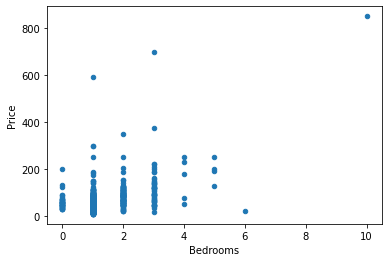

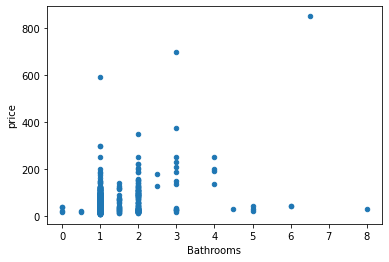

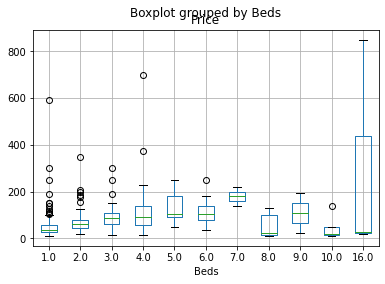

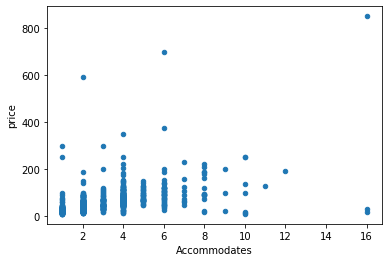

In [32]:
#Observación y limpieza de outlaiers

#scatter Bedrooms x Price
df_train.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

#boxplot Bathrooms x Price
df_train.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('Bathrooms')
plt.ylabel('price')
plt.show()

#boxplot Beds x Price
df_train.boxplot(by='Beds',column = 'Price')
plt.show()

#boxplot Accommodates x Price
df_train.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('Accommodates')
plt.ylabel('price')
plt.show()


In [33]:
#aplico filtros para reducir outliers
df_train_filter = df_train[(df_train['Bedrooms'] > 0) & (df_train['Bedrooms'] < 7)]
df_train_filter2 = df_train_filter[(df_train_filter['Bathrooms'] > 0) & (df_train_filter['Bathrooms'] < 4.5)]

df_train_filter4 = df_train_filter2[(df_train_filter2['Accommodates'] > 1) & (df_train_filter2['Accommodates'] < 11)]

In [34]:
#análisis de correlación 
df_train_filter4.corr().T

,index,Neighbourhood_Cleansed,Room_Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Extra_People,Number_of_Reviews,Review_Scores_Rating
index,1.000000,-0.015342,-0.057048,-0.062547,-0.014265,-0.017026,-0.047642,-0.004704,0.062925,0.025837,-0.005315
Neighbourhood_Cleansed,-0.015342,1.000000,0.130327,0.096993,0.101570,0.075835,0.047155,0.284689,0.046191,0.053990,0.012307
Room_Type,-0.057048,0.130327,1.000000,0.448125,0.010398,0.337451,0.242369,0.390509,0.106050,0.128737,-0.059199
Accommodates,-0.062547,0.096993,0.448125,1.000000,0.367244,0.674309,0.832374,0.417398,0.303418,0.084060,-0.141073
Bathrooms,-0.014265,0.101570,0.010398,0.367244,1.000000,0.452280,0.387778,0.375712,0.137749,-0.027901,0.026792
Bedrooms,-0.017026,0.075835,0.337451,0.674309,0.452280,1.000000,0.668281,0.417874,0.148720,-0.014584,-0.093432
Beds,-0.047642,0.047155,0.242369,0.832374,0.387778,0.668281,1.000000,0.313727,0.254648,0.058469,-0.180252
Price,-0.004704,0.284689,0.390509,0.417398,0.375712,0.417874,0.313727,1.000000,0.049200,-0.036405,0.100235
Extra_People,0.062925,0.046191,0.106050,0.303418,0.137749,0.148720,0.254648,0.049200,1.000000,0.101389,-0.092435
Number_of_Reviews,0.025837,0.053990,0.128737,0.084060,-0.027901,-0.014584,0.058469,-0.036405,0.101389,1.000000,-0.089680


In [35]:
df_train_filter4.index

Int64Index([  47,  814, 1085, 1303,  915,  263, 1427, 1288,  104, 1438,
            ...
             497,  327,  203,  951,   25, 1091,  112,  406, 1338,  174],
           dtype='int64', length=597)

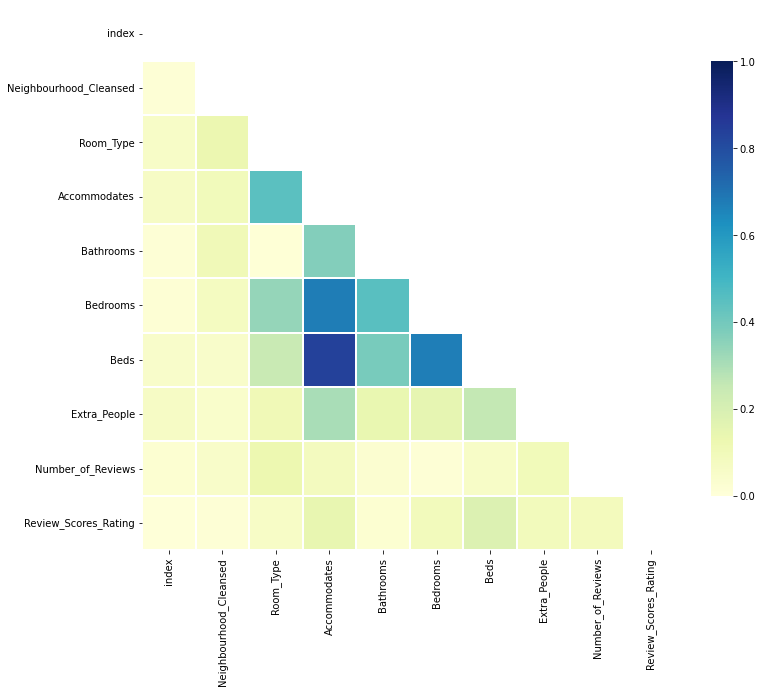

In [36]:
# Compute the correlation matrix
corr = np.abs(df_train_filter4.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [37]:
#elimino Beds por colinealidad con accommodates
df_training= df_train_filter4.drop(['Beds'],axis=1)

In [38]:
#veo las variables que me quedan
df_training.columns

Index(['index', 'Neighbourhood_Cleansed', 'Room_Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Price', 'Extra_People', 'Number_of_Reviews',
       'Review_Scores_Rating'],
      dtype='object')

In [39]:
#las nuevas medidas del df
df_training.shape

(597, 10)

In [40]:
df_training.fillna(0, inplace=True) #reemplazo los valores nulos a 0 por si los hubiera.

In [41]:
df_training.isnull().values.any() #me aseguro de que no hay valores nulos

False

### División de los datos de entrenamiento, la etiqueta y 'Price' por un lado, el resto por otro.

In [42]:
#Divido en X e y los datos del df
X_train =df_training.drop(['Price'], axis=1) # me defino un df sin la variable objetivo

# Obtener las etiquetas de regresion y_reg que la voy a llamar y_train
Y_train = df_training['Price'] #esta es mi variable objetivo

print('Filas, columnas', X_train.shape)
print('Filas, columnas', Y_train.shape)

Filas, columnas (597, 9)
Filas, columnas (597,)


## Cargo las imagenes de train para después

In [43]:
#Busco las imagenes de los train para el modelo CNN
images = np.load('./images.npy')
good_url = np.load('./good_url.npy')
indices_train= X_train.index #obtengo los indices de mi conjunto de entrenamiento

#me paso good_url a array #(podía haber lo hecho con good_urls que ya era una lista)
index_ = [] 
for elemento in good_url:
    index_.append(elemento)

#voy a buscar los indices de las imagenes que tengo en mi X_train
images_train_index= []

for elemento in indices_train:
   images_train_index.append(elemento)

#comparo los indices de train con good_url y asocio las imagenes 
imagenes_train=[]

for elemento in indices_train:
  for posicion, indice in enumerate(index_):
      if elemento == indice:
          imagenes_train.append(images[posicion])



In [44]:
indices_not_in_index_= []
def conjuntos(X_train,index):
  for a in X_train.index:
    if a not in index_:
      indices_not_in_index_.append(a)
      return False
  a +=1
  return True
conjuntos(X_train,index_)

True

In [45]:
len(imagenes_train)

597

In [46]:
imagenes_train

[array([[[ 86,  70,  54],
         [ 92,  76,  60],
         [ 89,  73,  57],
         ...,
         [105,  89,  74],
         [106,  90,  74],
         [107,  90,  72]],
 
        [[ 85,  69,  53],
         [ 92,  76,  59],
         [ 90,  74,  58],
         ...,
         [105,  90,  75],
         [106,  90,  74],
         [107,  90,  72]],
 
        [[ 85,  69,  53],
         [ 92,  76,  59],
         [ 91,  75,  59],
         ...,
         [106,  93,  77],
         [108,  92,  75],
         [108,  92,  73]],
 
        ...,
 
        [[113,  76,  51],
         [122,  87,  67],
         [ 93,  66,  51],
         ...,
         [ 80,  68,  54],
         [ 85,  73,  59],
         [ 87,  75,  59]],
 
        [[108,  72,  45],
         [118,  83,  62],
         [ 89,  63,  47],
         ...,
         [ 87,  76,  62],
         [ 93,  81,  67],
         [ 82,  70,  54]],
 
        [[105,  68,  42],
         [114,  79,  59],
         [ 87,  60,  44],
         ...,
         [ 96,  83,  69],
  

### Preparo y normalizo los datos de train

In [47]:
from sklearn.preprocessing import MinMaxScaler
#Normalizo las etiquetas con el máximo
Y_train_norm = Y_train /Y_train.max() 

#normalizo el resto de los datos con StandarScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_norm = scaler.fit_transform(X_train)


In [48]:
Y_train_norm

47      0.092857
814     0.314286
1085    0.041429
1303    0.038571
915     0.064286
          ...   
1091    0.121429
112     0.098571
406     0.357143
1338    0.020000
174     0.142857
Name: Price, Length: 597, dtype: float64

In [49]:
X_train_norm

array([[0.02864107, 0.12551906, 1.        , ..., 0.14285714, 0.06086957,
        0.9875    ],
       [0.53503961, 0.17472901, 1.        , ..., 0.42857143, 0.01304348,
        0.75      ],
       [0.70018282, 0.13265055, 0.2516646 , ..., 0.        , 0.00434783,
        1.        ],
       ...,
       [0.25533211, 0.28425821, 1.        , ..., 0.5       , 0.05217391,
        0.875     ],
       [0.86288848, 0.05662514, 0.2516646 , ..., 0.1       , 0.        ,
        1.        ],
       [0.10603291, 0.11832557, 1.        , ..., 0.07142857, 0.3       ,
        0.8875    ]])

### Cargamos los datos de test

In [50]:
#df_test = pd.read_csv('./test.csv', sep=';', decimal='.') #OJO! si cargo el csv me cambia los indices porque lee de nuevo y hace un df del csv
df_test = test
df_test.head()

,index,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
786,850,6012785,https://www.airbnb.com/rooms/6012785,20170407214119,2017-04-08,Luxury and wide room(14) in GranVía,Spacious room in luxury and recently apartmen...,Spacious room with the window to an interior c...,Spacious room in luxury and recently apartmen...,none,...,10.0,8.0,6.0,NaN,NaN,strict,38,0.10,"40.419166227167565,-3.699832448836666","Host Has Profile Pic,Is Location Exact,Require..."
1148,1212,6470318,https://www.airbnb.com/rooms/6470318,20170407214119,2017-04-08,Habitación interior .wifi,"Esta habitación . , cama 135 cm x 190 cm, es i...",NaN,"Esta habitación . , cama 135 cm x 190 cm, es i...",none,...,10.0,10.0,10.0,NaN,NaN,flexible,2,3.60,"40.42234504195288,-3.6973619959416792","Host Is Superhost,Host Has Profile Pic,Require..."
1152,1216,15066726,https://www.airbnb.com/rooms/15066726,20170407214119,2017-04-08,"Centro Madrid, gran vía, malasaña",Precioso y acogedor apartamento en pleno cora...,NaN,Precioso y acogedor apartamento en pleno cora...,none,...,10.0,10.0,10.0,NaN,NaN,strict,9,1.84,"40.422285111509964,-3.7076464229069788","Host Has Profile Pic,Requires License,Instant ..."
1022,1086,15081897,https://www.airbnb.com/rooms/15081897,20170407214119,2017-04-08,Love Huertas,Apartamento en pleno centro histórico de Madri...,"Apartamento exterior, con mucha luz, con ampli...",Apartamento en pleno centro histórico de Madri...,none,...,10.0,10.0,10.0,NaN,NaN,flexible,1,2.76,"40.41228770222658,-3.6989316250797732","Host Is Superhost,Host Has Profile Pic,Host Id..."
630,692,17215188,https://www.airbnb.com/rooms/17215188,20170407214119,2017-04-08,Apartamento en el centro cool de madrid o nego...,Apartamento muy còmodo en la zona mas cool de ...,"El apartamento esta bien conectado , estacion ...",Apartamento muy còmodo en la zona mas cool de ...,none,...,9.0,10.0,9.0,NaN,NaN,moderate,1,5.00,"40.423857414172716,-3.6960182660276586","Host Has Profile Pic,Is Location Exact,Require..."


### Aplicamos los mismos filtros que he aplicado en train

In [51]:
#elimino las filas que no son de Madrid
df_test = df_test.loc[df_test['City']=='Madrid']
#compruebo que las he eliminado
(df_test['City'] != 'Madrid').sum()

0

In [52]:
#eliminar variables irrelevantes para el modelo
df_test = df_test.drop(['Neighbourhood','City','Zipcode','ID','Listing Url','Scrape ID','Last Scraped',
                                  'Name', 'Summary','Space','Description','Experiences Offered','Neighborhood Overview',
                                  'Notes','Amenities','Square Feet','Transit','Access' ,'Interaction', 'House Rules' ,
                                  'Medium Url','Picture Url','XL Picture Url','Host ID', 'Host URL', 
                                  'Host Name', 'Host Since', 'Host Location', 'Host About','Host Response Time',
                                  'Host Response Rate','Host Acceptance Rate','Host Thumbnail Url','Host Picture Url', 
                                  'Host Neighbourhood','Host Listings Count','Host Total Listings Count','Host Verifications',
                                  'Street','Neighbourhood Group Cleansed','State','Market','Smart Location','Country Code',
                                  'Country','Latitude','Longitude', 'Security Deposit','Cleaning Fee',
                                  'Minimum Nights','Maximum Nights','Calendar Updated','Has Availability','Availability 30',
                                  'Availability 60','Availability 90','Availability 365','Calendar last Scraped', 
                                  'First Review','Last Review','Review Scores Accuracy','Review Scores Cleanliness',
                                  'Review Scores Checkin','Weekly Price', 'Monthly Price','Review Scores Communication',
                                  'Review Scores Location','Review Scores Value','License','Jurisdiction Names',
                                  'Calculated host listings count','Reviews per Month','Geolocation','Features','Guests Included', 
                                  'Cancellation Policy','Bed Type','Property Type' ], axis=1)
df_train.columns

Index(['index', 'Neighbourhood_Cleansed', 'Room_Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Extra_People',
       'Number_of_Reviews', 'Review_Scores_Rating'],
      dtype='object')

In [53]:
#renombro las columnas
df_test.columns=['index','Neighbourhood_Cleansed', 'Room_Type','Accommodates',
                  'Bathrooms', 'Bedrooms', 'Beds','Price','Extra_People',
                      'Number_of_Reviews', 'Review_Scores_Rating']

In [54]:
#Imputación de valores nulos por la moda
df_test["Bedrooms"].fillna(df_test["Bedrooms"].mode()[0], inplace=True)
df_test["Review_Scores_Rating"].fillna(df_test["Review_Scores_Rating"].mode()[0], inplace=True) 
#compruebo
print(f'Bedrooms tiene: ', df_test['Bedrooms'].isnull().sum())
print(f'Review_Scores_Rating tiene: ', df_test['Review_Scores_Rating'].isnull().sum())

Bedrooms tiene:  0
Review_Scores_Rating tiene:  0


In [55]:
#compruebo si hay más valores nulos 
df_test.isnull().any()

index                     False
Neighbourhood_Cleansed    False
Room_Type                 False
Accommodates              False
Bathrooms                 False
Bedrooms                  False
Beds                       True
Price                     False
Extra_People              False
Number_of_Reviews         False
Review_Scores_Rating      False
dtype: bool

In [56]:
#utilizo MeanEncoder para imputar con la media de la variable objetivo
categorical = ['Neighbourhood_Cleansed', 'Room_Type']

mean_map = {}
for c in categorical:
    mean = df_test.groupby(c)['Price'].mean()
    df_test[c] = df_test[c].map(mean)    
    mean_map[c] = mean
df_test.dtypes

index                       int64
Neighbourhood_Cleansed    float64
Room_Type                 float64
Accommodates                int64
Bathrooms                 float64
Bedrooms                  float64
Beds                      float64
Price                     float64
Extra_People                int64
Number_of_Reviews           int64
Review_Scores_Rating      float64
dtype: object

In [57]:
#aplico filtros para reducir outliers
df_test_filter = df_test[(df_test['Bedrooms'] > 0) & (df_test['Bedrooms'] < 7)]
df_test_filter2 = df_test_filter[(df_test_filter['Bathrooms'] > 0) & (df_test_filter['Bathrooms'] < 4.5)]

df_test_filter4 = df_test_filter2[(df_test_filter2['Accommodates'] > 1) & (df_test_filter2['Accommodates'] < 11)]

In [58]:
#elimino Beds por colinealidad con accommodates
df_testing= df_test_filter4.drop(['Beds'],axis=1)

In [59]:
#veo las variables que me quedan
df_testing.columns

Index(['index', 'Neighbourhood_Cleansed', 'Room_Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Price', 'Extra_People', 'Number_of_Reviews',
       'Review_Scores_Rating'],
      dtype='object')

In [60]:
#las nuevas medidas del df
df_testing.shape

(158, 10)

In [61]:
df_testing.fillna(0, inplace=True) #reemplazo los valores nulos a 0 por si los hubiera.

In [62]:
df_testing.isnull().values.any()

False

### Split en X e y  de los datos de test

In [63]:
#excluyo las etiquetas del split
X_test =df_testing.drop(['Price'], axis=1) # me defino un df sin la variable objetivo

# Obtener las etiquetas de regresion y_reg que la voy a llamar y_test
Y_test = df_testing['Price'] #esta es mi variable objetivo

print('Filas, columnas', X_test.shape)
print('Filas, columnas', Y_test.shape)

Filas, columnas (158, 9)
Filas, columnas (158,)


## me saco las imagenes para luego

In [64]:
#Busco las imagenes de test para el modelo CNN

#images = np.load('./images.npy') ya está cargado
#good_url = np.load('./good_url.npy') ya está cargado
indices_test= X_test.index

#me paso good_url a lista (podía haber lo hecho con good_urls que ya era una lista)
index_tst_ = [] 
for elemento in good_url:
    index_tst_.append(elemento)
  

#voy a buscar los indices de las imagenes que tengo en mi X_train
images_test_index= []

for elemento in indices_test:
    images_test_index.append(elemento)



#comparo los indices de train con good_url y asocio las imagenes 
imagenes_test=[]

for elemento in indices_test:
  for posicion, indice in enumerate(index_tst_):
      if elemento == indice:
          imagenes_test.append(images[posicion])




In [65]:
len(imagenes_test)

158

### normalizamos datos de test

In [66]:
# Normalizamos los datos (sin la variable objetivo), entre 0 y 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_test_norm = scaler.fit_transform(X_test) #estandarizo con el fit de train

y_test_norm = Y_test /Y_train.max() #estandarizo el precio con el max del precio en train

#simplifico el nombre con los datos normalizados, hago este paso para tener claro que he normalizado antes
x_train = X_train_norm
y_train = Y_train_norm
x_test = X_test_norm
y_test = y_test_norm

##### Compruebo que todos mis datos están normalizados entre 0 y 1

In [67]:
x_train

array([[0.02864107, 0.12551906, 1.        , ..., 0.14285714, 0.06086957,
        0.9875    ],
       [0.53503961, 0.17472901, 1.        , ..., 0.42857143, 0.01304348,
        0.75      ],
       [0.70018282, 0.13265055, 0.2516646 , ..., 0.        , 0.00434783,
        1.        ],
       ...,
       [0.25533211, 0.28425821, 1.        , ..., 0.5       , 0.05217391,
        0.875     ],
       [0.86288848, 0.05662514, 0.2516646 , ..., 0.1       , 0.        ,
        1.        ],
       [0.10603291, 0.11832557, 1.        , ..., 0.07142857, 0.3       ,
        0.8875    ]])

In [68]:
y_train

47      0.092857
814     0.314286
1085    0.041429
1303    0.038571
915     0.064286
          ...   
1091    0.121429
112     0.098571
406     0.357143
1338    0.020000
174     0.142857
Name: Price, Length: 597, dtype: float64

In [69]:
x_test

array([[0.73333333, 0.18947368, 0.        , ..., 0.        , 0.10238908,
        1.        ],
       [0.73582555, 0.12214912, 1.        , ..., 0.22222222, 0.04095563,
        0.78378378],
       [0.65482866, 0.15508772, 1.        , ..., 0.27777778, 0.05802048,
        0.86486486],
       ...,
       [0.31962617, 0.02222222, 0.        , ..., 0.19444444, 0.06825939,
        0.59459459],
       [0.60809969, 0.18181818, 1.        , ..., 0.47222222, 0.00341297,
        1.        ],
       [0.05669782, 0.12214912, 1.        , ..., 0.        , 0.17406143,
        0.86486486]])

In [70]:
y_test

1148    0.057143
1152    0.082857
1022    0.098571
630     0.090000
972     0.034286
          ...   
326     0.071429
626     0.088571
499     0.028571
947     0.205714
126     0.071429
Name: Price, Length: 158, dtype: float64

### Compruebo medidas del dataset 


In [71]:
# Comprobar el tamaño del dataset
print("El conjunto de entrenamiento tiene dimensiones: ", x_train.shape)
#print("El conjunto de validación tiene dimensiones: ",x_val.shape)
print("El conjunto de test tiene dimensiones: ",x_test.shape)

El conjunto de entrenamiento tiene dimensiones:  (597, 9)
El conjunto de test tiene dimensiones:  (158, 9)


## Modelo con datos 1D

### Importamos librerias

In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.optimizers.legacy import Adam
import matplotlib.pyplot as plt
from pandas.core.common import flatten
from tensorflow.keras import optimizers, Model

In [73]:
# Hiper-parámetros de nuestra red, pruebo distintos parámetros hasta mejorar mi modelo

#lr = 0.1
#lr_decay = 1e-4
#n_epochs = 200  
#batch_size = 128

#cambio los parámetros para reducir el consumo de memoria y que tarde menos en entrenar
lr = 0.1
lr_decay = 1e-4
n_epochs = 100
batch_size = 64

#vuelvo a mejorar los parámetros para que aun me tarde menos al entrenar

#lr = 0.05
#lr_decay = 1e-4
#n_epochs = 50
#batch_size = 32


In [74]:
x_train.shape #este es mi input shape

(597, 9)

[INFO]: Entrenando red neuronal...
Epoch 1/100
8/8 [==============================] - 1s 23ms/step - loss: 0.1239 - val_loss: 0.0992
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0876 - val_loss: 0.0694
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0612 - val_loss: 0.0482
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0430 - val_loss: 0.0343
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0312 - val_loss: 0.0255
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0236 - val_loss: 0.0198
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0187 - val_loss: 0.0163
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0156 - val_loss: 0.0140
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 0.0135 - val_loss: 0.0125
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0121 - val_loss: 

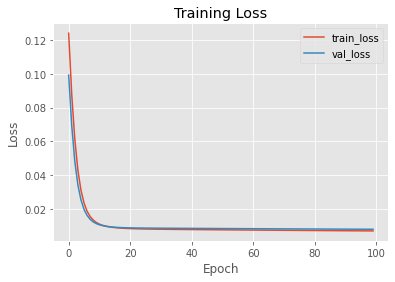

In [75]:
np.random.seed(42)
# Implementamos la red empleando Keras
lineal_model = Sequential() # Instancia de modelo API secuencial #(X)
#model.add(Flatten()) # Estiramos los datos en forma de vector como entrada 
#model.add(Dense(128, activation="relu", kernel_initializer='random_uniform', bias_initializer='zeros'))
lineal_model.add(Dense(9, input_shape=(9,),activation="relu")) 
lineal_model.add(Dense(5, activation="relu")) # Añadimos una capa con 32 neuronas y añadimos una función de activacion
lineal_model.add(Dense(1, activation="sigmoid"))  # Construimos nuestro Perceptron
  
# Compilamos y entrenamos el modelo SGD
print("[INFO]: Entrenando red neuronal...")
lineal_model.compile(loss="mean_squared_error", optimizer=SGD(lr, decay=lr_decay/n_epochs))  #(X) optimizer='adam'

# Entrenando la solución
H_lm = lineal_model.fit(x_train, y_train, validation_split=0.2 , epochs=n_epochs, batch_size=batch_size)  #(X) aquí divido los datos de validacion

# Genero la predicción con los datos estandarizados de test
pred_lm = lineal_model.predict(x_test, batch_size=batch_size)


lineal_model.summary()
# Muestro gráfica de losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n_epochs), H_lm.history["loss"], label="train_loss")
plt.plot(np.arange(0, n_epochs), H_lm.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [76]:
#calculo el mse y el mae del modelo
max_Y = Y_train.max()
pred_lm_denorm = pred_lm * max_Y
y_test_denorm = y_test * max_Y

rmse = mean_squared_error(y_true  = y_test_denorm, y_pred  = pred_lm_denorm,squared = False)
print(f"El error cuadrático medio (rmse) de test es: {rmse}")

mae = mean_absolute_error(y_test_denorm, pred_lm_denorm)
print(f"El error aboluto(mae) de test es: {mae}")

El error cuadrático medio (rmse) de test es: 59.82627081327269
El error aboluto(mae) de test es: 42.29910198646256


In [77]:
#calculamos las perdidas del modelo
test_loss = lineal_model.evaluate(x_test, y_test, verbose=0)
print('test loss: ', test_loss) 

test loss:  0.00730445422232151


##Modelo CNN

#### Preparación de los datos

In [78]:
#Preparo los datos 
X_train_img = imagenes_train
X_test_img = imagenes_test

In [79]:
#Comprobamos que tenemos todas las imagenes de X_Train y X_test cargadas con sus indices correspondientes
print('El número total de imagenes de entrenamiento es: ',len(imagenes_train)) # no son las imagenes correctas
print('El número total de imagenes de testing es: ',len(imagenes_test)) 
print("\n")
print("Las etiquetas de entrenamiento ", y_train.shape)
print("Las etiquetas de testing: ",y_test.shape)

El número total de imagenes de entrenamiento es:  597
El número total de imagenes de testing es:  158


Las etiquetas de entrenamiento  (597,)
Las etiquetas de testing:  (158,)


In [80]:
#mis imagenes son imagenes_train & imagenes_test

In [81]:
!pip install imageio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
# import necesarios

from keras.models import Sequential
from keras.applications import VGG16, ResNet50
from keras.applications.inception_v3 import preprocess_input
from keras import optimizers, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.applications import imagenet_utils
import imageio as io

#inicializo con una semilla
np.random.seed(42)

input_shape = (224, 224, 3)


#X_train = imagenes_train
#X_test = imagenes_test
#y_train = y_train
#y_test = y_test

In [83]:
#Realizamos el resize de las imagenes
input_shape = (224, 224,3)

 #resize train set
X_train_resized = []
for img in x_train:
  X_train_resized.append( cv2.resize(img, (224, 224))/255)
  
X_train_resized = np.array(X_train_resized)
print('X_train_resized: ',X_train_resized.shape)


 #resize test set
X_test_resized = []
for img in x_test:
  X_test_resized.append( cv2.resize(img, (224, 224))/255)
  
X_test_resized = np.array(X_test_resized)
print('X_test_resized: ',X_test_resized.shape)

X_train_resized:  (597, 224, 224)
X_test_resized:  (158, 224, 224)


In [84]:
# normalizamos
new_width = 224
new_height = 224
dim = (new_width, new_height)

# Inicializa una lista para almacenar las imágenes redimensionadas y normalizadas
X_train_resized = []

# Recorre cada imagen en x_train
for img in imagenes_train:
    # Redimensiona la imagen
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    
    # Convierte la imagen en un array numpy y normaliza los valores de los pixeles
    image_array = np.array(resized, dtype='float32') / 255.0

    # Agrega la imagen redimensionada y normalizada a la lista
    X_train_resized.append(image_array)
    
#Realizamos lo mismo para los datos test

X_test_resized = []

for img in imagenes_test:
    
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    # Convierte la imagen en un array numpy y normaliza los valores de los pixeles
    image_array = np.array(resized, dtype='float32') / 255.0 

    # Agrega la imagen redimensionada y normalizada a la lista
    X_test_resized.append(image_array)
   

In [85]:
 print((X_train_resized))

[array([[[0.3372549 , 0.27450982, 0.21176471],
        [0.36078432, 0.29803923, 0.23529412],
        [0.34901962, 0.28627452, 0.22352941],
        ...,
        [0.4117647 , 0.34901962, 0.2901961 ],
        [0.41568628, 0.3529412 , 0.2901961 ],
        [0.41960785, 0.3529412 , 0.28235295]],

       [[0.33333334, 0.27058825, 0.20784314],
        [0.36078432, 0.29803923, 0.23137255],
        [0.3529412 , 0.2901961 , 0.22745098],
        ...,
        [0.4117647 , 0.3529412 , 0.29411766],
        [0.41568628, 0.3529412 , 0.2901961 ],
        [0.41960785, 0.3529412 , 0.28235295]],

       [[0.33333334, 0.27058825, 0.20784314],
        [0.36078432, 0.29803923, 0.23137255],
        [0.35686275, 0.29411766, 0.23137255],
        ...,
        [0.41568628, 0.3647059 , 0.3019608 ],
        [0.42352942, 0.36078432, 0.29411766],
        [0.42352942, 0.36078432, 0.28627452]],

       ...,

       [[0.44313726, 0.29803923, 0.2       ],
        [0.47843137, 0.34117648, 0.2627451 ],
        [0.3647059 , 

In [86]:
print((X_test_resized))

[array([[[0.8352941 , 0.5137255 , 0.18431373],
        [0.83137256, 0.50980395, 0.18039216],
        [0.827451  , 0.5058824 , 0.1764706 ],
        ...,
        [0.8980392 , 0.8627451 , 0.84313726],
        [0.89411765, 0.85882354, 0.8392157 ],
        [0.8784314 , 0.84313726, 0.8235294 ]],

       [[0.83137256, 0.5058824 , 0.1764706 ],
        [0.83137256, 0.50980395, 0.18039216],
        [0.83137256, 0.50980395, 0.18039216],
        ...,
        [0.9019608 , 0.8666667 , 0.84705883],
        [0.8862745 , 0.8509804 , 0.83137256],
        [0.8745098 , 0.8392157 , 0.81960785]],

       [[0.81960785, 0.49803922, 0.16862746],
        [0.83137256, 0.50980395, 0.18039216],
        [0.8392157 , 0.5176471 , 0.1882353 ],
        ...,
        [0.90588236, 0.87058824, 0.8509804 ],
        [0.88235295, 0.84705883, 0.827451  ],
        [0.8745098 , 0.8392157 , 0.81960785]],

       ...,

       [[0.11372549, 0.05490196, 0.02745098],
        [0.10980392, 0.05098039, 0.02352941],
        [0.10588235, 

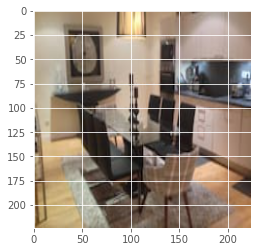

In [87]:
plt.imshow(X_test_resized[12])

#### Comienzo con un Trasfer Learning de VGG16 (mis muestras son poco más de 500) con todas las capas congeladas

In [88]:
np.random.seed(42)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [89]:
#Congelamos todas las capas de extración de características y modificamos el clasificador
for layer in base_model.layers: 
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada.')

# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output
x = Flatten()(last) #globalMaxPooling #pasar el tensor de caracteristicas a vector
x = Dense(9, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x) # regularización para reducir el sobreajuste
x = Dense(1, activation='linear', name='predictions')(x) #linear multiplica por x1.0, es la indentity function
model_cnn = Model(base_model.input, x)

# compilamos el modelo
model_cnn.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error', metrics=['mse'])

# vemos la estructura del modelo
model_cnn.summary()

Capa input_1 congelada.
Capa block1_conv1 congelada.
Capa block1_conv2 congelada.
Capa block1_pool congelada.
Capa block2_conv1 congelada.
Capa block2_conv2 congelada.
Capa block2_pool congelada.
Capa block3_conv1 congelada.
Capa block3_conv2 congelada.
Capa block3_conv3 congelada.
Capa block3_pool congelada.
Capa block4_conv1 congelada.
Capa block4_conv2 congelada.
Capa block4_conv3 congelada.
Capa block4_pool congelada.
Capa block5_conv1 congelada.
Capa block5_conv2 congelada.
Capa block5_conv3 congelada.
Capa block5_pool congelada.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64

In [90]:
X_train_resized = np.array(X_train_resized)
X_test_resized = np.array(X_test_resized)

Epoch 1/20
4/4 [==============================] - 26s 5s/step - loss: 6040.4580 - mse: 6040.4580 - val_loss: 4714.8267 - val_mse: 4714.8267
Epoch 2/20
4/4 [==============================] - 2s 619ms/step - loss: 3596.8206 - mse: 3596.8206 - val_loss: 3719.4998 - val_mse: 3719.4998
Epoch 3/20
4/4 [==============================] - 2s 614ms/step - loss: 3684.9678 - mse: 3684.9678 - val_loss: 3872.6179 - val_mse: 3872.6179
Epoch 4/20
4/4 [==============================] - 2s 633ms/step - loss: 3832.6138 - mse: 3832.6138 - val_loss: 3778.6116 - val_mse: 3778.6116
Epoch 5/20
4/4 [==============================] - 2s 618ms/step - loss: 3400.5078 - mse: 3400.5078 - val_loss: 3631.5134 - val_mse: 3631.5134
Epoch 6/20
4/4 [==============================] - 2s 624ms/step - loss: 3012.7361 - mse: 3012.7361 - val_loss: 3715.2068 - val_mse: 3715.2068
Epoch 7/20
4/4 [==============================] - 2s 629ms/step - loss: 3097.6101 - mse: 3097.6101 - val_loss: 3813.9597 - val_mse: 3813.9597
Epoch 8/

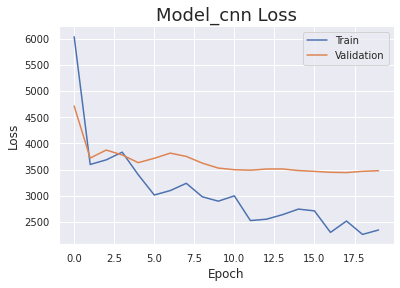

In [91]:
# comenzamos con el entrenamiento
epochs = 20
batch_size = 128

# como entrenariamos normalmente
H_model_cnn = model_cnn.fit(X_train_resized, Y_train,
          batch_size=batch_size,
          validation_split=0.2,
          epochs=epochs)

# Evaluamos el modelo
print("[INFO]: Evaluando red neuronal...")
pred_cnn = model_cnn.predict(X_test_resized, batch_size=batch_size)  #(X)

model_cnn.summary()

#grafico
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
plt.plot(H_model_cnn.history['loss'], label='Train')
plt.plot(H_model_cnn.history['val_loss'], label='Validation')
plt.title('Model_cnn Loss', fontsize=18)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right', fontsize=10)
sns.despine()
plt.show()

In [92]:
#calculo el mse y el mae del modelo
max_Y = Y_train.max()
pred_cnn_denorm = pred_cnn 
y_test_denorm = y_test * max_Y

rmse = mean_squared_error(y_true  = y_test_denorm, y_pred  = pred_cnn_denorm,squared = False)
print(f"El error cuadrático medio (rmse) de test es: {rmse}")

mae = mean_absolute_error(y_test_denorm, pred_cnn_denorm)
print(f"El error aboluto(mae) de test es: {mae}")


El error cuadrático medio (rmse) de test es: 51.482244193859664
El error aboluto(mae) de test es: 30.06005585344532


In [93]:
#calculamos las perdidas del modelo
scores = model_cnn.evaluate(X_test_resized, Y_test, verbose=1)
print('Test loss:', scores[0])


5/5 [==============================] - 3s 121ms/step - loss: 2650.4216 - mse: 2650.4216
Test loss: 2650.421630859375


#### Empiezo a descongelar capas

#### voy a aplicar Fine Tuning 

In [94]:
#inicializo con una semilla
np.random.seed(42)
input_shape = (224, 224, 3)

bm_FT = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
bm_FT.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [95]:
np.random.seed(42)
# Hago Fine Tuning, Descongelo la ultima capa convolucional
from keras.regularizers import l2

for layer in bm_FT.layers:
  if layer.name == 'block5_conv1': #descongelo el bloque 5
    break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada.')

# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = bm_FT.layers[-1].output
x = Flatten()(last)
x = Dense(9, activation='relu', name='fc1')(x) 
x = Dropout(0.3)(x)
x = Dense(1, activation='linear', name='predictions')(x)#linear multiplica por x1.0, es la indentity function
model_FT = Model(bm_FT.input, x)

# compilamos el modelo
model_FT.compile(optimizer=Adam(lr=0.001), loss='mse', metrics=['mse'])

# vemos la nueva estructura del modelo
model_FT.summary()

Capa input_2 congelada.
Capa block1_conv1 congelada.
Capa block1_conv2 congelada.
Capa block1_pool congelada.
Capa block2_conv1 congelada.
Capa block2_conv2 congelada.
Capa block2_pool congelada.
Capa block3_conv1 congelada.
Capa block3_conv2 congelada.
Capa block3_conv3 congelada.
Capa block3_pool congelada.
Capa block4_conv1 congelada.
Capa block4_conv2 congelada.
Capa block4_conv3 congelada.
Capa block4_pool congelada.
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  

Epoch 1/20
4/4 [==============================] - 5s 898ms/step - loss: 17067.3555 - mse: 17067.3555 - val_loss: 3603.5037 - val_mse: 3603.5037
Epoch 2/20
4/4 [==============================] - 3s 669ms/step - loss: 5856.0732 - mse: 5856.0732 - val_loss: 8348.8242 - val_mse: 8348.8242
Epoch 3/20
4/4 [==============================] - 3s 682ms/step - loss: 7232.6641 - mse: 7232.6641 - val_loss: 6667.9897 - val_mse: 6667.9897
Epoch 4/20
4/4 [==============================] - 3s 734ms/step - loss: 5235.4570 - mse: 5235.4570 - val_loss: 3982.4089 - val_mse: 3982.4089
Epoch 5/20
4/4 [==============================] - 3s 685ms/step - loss: 4782.5674 - mse: 4782.5674 - val_loss: 5006.9219 - val_mse: 5006.9219
Epoch 6/20
4/4 [==============================] - 3s 675ms/step - loss: 4290.9971 - mse: 4290.9971 - val_loss: 3689.5208 - val_mse: 3689.5208
Epoch 7/20
4/4 [==============================] - 3s 680ms/step - loss: 4222.9351 - mse: 4222.9351 - val_loss: 4743.7261 - val_mse: 4743.7261
Epoc

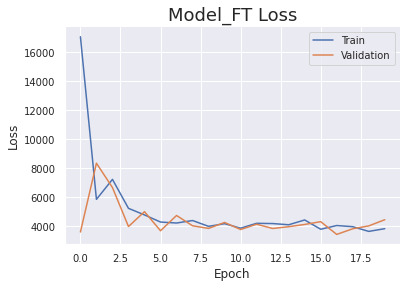

In [96]:
#entreno de nuevo

# como entrenariamos normalmente
H_model_FT = model_FT.fit(X_train_resized, Y_train,
          batch_size=batch_size,
          validation_split=0.2,
          epochs=20)

# Evaluamos el modelo
print("[INFO]: Evaluando red neuronal...")
pred_FT = model_FT.predict(X_test_resized, batch_size=128)  #(X)

model_FT.summary()

#grafico
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
plt.plot(H_model_FT.history['loss'], label='Train')
plt.plot(H_model_FT.history['val_loss'], label='Validation')
plt.title('Model_FT Loss', fontsize=18)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right', fontsize=10)
sns.despine()
plt.show()

In [97]:
#calculo el mse y el mae del modelo
max_Y = Y_train.max()
pred_FT_denorm = pred_FT
y_test_denorm = y_test * max_Y

rmse = mean_squared_error(y_true  = y_test_denorm, y_pred  = pred_FT_denorm,squared = False)
print(f"El error cuadrático medio (rmse) de test es: {rmse}")

mae = mean_absolute_error(y_test_denorm, pred_FT_denorm)
print(f"El error aboluto(mae) de test es: {mae}")


El error cuadrático medio (rmse) de test es: 59.780244692256844
El error aboluto(mae) de test es: 35.90731303601326


In [98]:
# comprobamos el loss en el test set
scores = model_FT.evaluate(X_test_resized, Y_test, verbose=1)
print('Test loss:', scores[0])



5/5 [==============================] - 1s 121ms/step - loss: 3573.6775 - mse: 3573.6775
Test loss: 3573.677490234375


##### voy a modificar los parámetros a ver si mejora

##### Pruebo a descongelar el penúltimo bloque a ver si mejora

In [99]:
#inicializo con una semilla
np.random.seed(42)
input_shape = (224, 224, 3)

bm_FT2 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
bm_FT2.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [100]:
# Descongelo otra capa convolucional
#from keras.regularizers import l2

for layer in bm_FT2.layers:
  if layer.name == 'block4_conv1': 
    break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada.')

# cogemos la penúltima capa del model y le añadimos nuestro clasificador (top_model)
last = bm_FT2.layers[-1].output
x = Flatten()(last)
x = Dense(9, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(1, activation='linear', name='predictions')(x)#linear multiplica por x1.0, es la indentity function
model_FT2 = Model(bm_FT2.input, x)

# compilamos el modelo
model_FT2.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error', metrics=['mse'])

# vemos la nueva estructura del modelo
model_FT2.summary()

Capa input_3 congelada.
Capa block1_conv1 congelada.
Capa block1_conv2 congelada.
Capa block1_pool congelada.
Capa block2_conv1 congelada.
Capa block2_conv2 congelada.
Capa block2_pool congelada.
Capa block3_conv1 congelada.
Capa block3_conv2 congelada.
Capa block3_conv3 congelada.
Capa block3_pool congelada.
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv

Epoch 1/20
4/4 [==============================] - 9s 2s/step - loss: 8478.0371 - mse: 8478.0371 - val_loss: 4836.8687 - val_mse: 4836.8687
Epoch 2/20
4/4 [==============================] - 3s 821ms/step - loss: 30725.9434 - mse: 30725.9414 - val_loss: 7931.4214 - val_mse: 7931.4214
Epoch 3/20
4/4 [==============================] - 3s 823ms/step - loss: 6553.9497 - mse: 6553.9497 - val_loss: 4723.3755 - val_mse: 4723.3755
Epoch 4/20
4/4 [==============================] - 3s 817ms/step - loss: 4051.4524 - mse: 4051.4524 - val_loss: 4718.8843 - val_mse: 4718.8843
Epoch 5/20
4/4 [==============================] - 3s 818ms/step - loss: 3806.0298 - mse: 3806.0298 - val_loss: 3679.8037 - val_mse: 3679.8037
Epoch 6/20
4/4 [==============================] - 3s 819ms/step - loss: 3640.2244 - mse: 3640.2244 - val_loss: 3947.2024 - val_mse: 3947.2024
Epoch 7/20
4/4 [==============================] - 3s 817ms/step - loss: 3361.4380 - mse: 3361.4380 - val_loss: 3652.9954 - val_mse: 3652.9954
Epoch 8

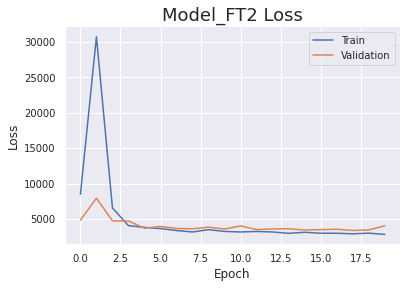

In [101]:
#entreno de nuevo

# como entrenariamos normalmente
H_model_FT2 = model_FT2.fit(X_train_resized, Y_train,
          batch_size=batch_size,
          validation_split=0.2,
          epochs=20) #aumento las epocas a lo bestia a ver si mejora 

# Evaluamos el modelo
print("[INFO]: Evaluando red neuronal...")
pred_FT2 = model_FT2.predict(X_test_resized, batch_size=128)  #(X) 

model_FT2.summary()

#grafico
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
plt.plot(H_model_FT2.history['loss'], label='Train')
plt.plot(H_model_FT2.history['val_loss'], label='Validation')
plt.title('Model_FT2 Loss', fontsize=18)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right', fontsize=10)
sns.despine()
plt.show()

In [102]:
#calculo el mse y el mae del modelo
max_Y = Y_train.max()
pred_FT2_denorm = pred_FT2
y_test_denorm = y_test * max_Y

rmse = mean_squared_error(y_true  = y_test_denorm, y_pred  = pred_FT2_denorm,squared = False)
print(f"El error cuadrático medio (rmse) de test es: {rmse}")

mae = mean_absolute_error(y_test_denorm, pred_FT2_denorm)
print(f"El error aboluto(mae) de test es: {mae}")


El error cuadrático medio (rmse) de test es: 58.23673643562221
El error aboluto(mae) de test es: 33.94109387940998


##### Aquí me empeora el modelo, no voy a seguir descongelando capas, me quedo con el modelo anterior model_FT con solo el último bloque convolucional descongelado. Muestro los mejores resultados que he obtenido hasta ahora.

In [103]:
#calculo el mse y el mae del modelo
max_Y = Y_train.max()
pred_FT_denorm = pred_FT
y_test_denorm = y_test * max_Y

rmse = mean_squared_error(y_true  = y_test_denorm, y_pred  = pred_FT_denorm,squared = False)
print(f"El error cuadrático medio (rmse) de test es: {rmse}")

mae = mean_absolute_error(y_test_denorm, pred_FT_denorm)
print(f"El error aboluto(mae) de test es: {mae}")


El error cuadrático medio (rmse) de test es: 59.780244692256844
El error aboluto(mae) de test es: 35.90731303601326


In [104]:
# comprobamos el loss en el test set
scores = model_FT.evaluate(X_test_resized, Y_test, verbose=1)
print('Test loss:', scores[0])


5/5 [==============================] - 1s 121ms/step - loss: 3573.6775 - mse: 3573.6775
Test loss: 3573.677490234375


##### Voy a probar con hyperopt a buscar los parámetros óptimos

##### Mejoro el modelo usando hyperot

In [105]:
!pip uninstall networkx
!pip install networkx==2.6.2


Found existing installation: networkx 2.6.2
Uninstalling networkx-2.6.2:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/networkx-2.6.2.dist-info/*
    /usr/local/lib/python3.9/dist-packages/networkx/*
    /usr/local/share/doc/networkx-2.6.2/LICENSE.txt
    /usr/local/share/doc/networkx-2.6.2/examples/3d_drawing/README.txt
    /usr/local/share/doc/networkx-2.6.2/examples/3d_drawing/mayavi2_spring.py
    /usr/local/share/doc/networkx-2.6.2/examples/3d_drawing/plot_basic.py
    /usr/local/share/doc/networkx-2.6.2/examples/README.txt
    /usr/local/share/doc/networkx-2.6.2/examples/algorithms/README.txt
    /usr/local/share/doc/networkx-2.6.2/examples/algorithms/WormNet.v3.benchmark.txt
    /usr/local/share/doc/networkx-2.6.2/examples/algorithms/hartford_drug.edgelist
    /usr/local/share/doc/networkx-2.6.2/examples/algorithms/plot_beam_search.py
    /usr/local/share/doc/networkx-2.6.2/examples/algorithms/plot_betweenness_centrality.py
    /usr/local/share/doc/networkx-2.6.2/ex

In [106]:
# instalamos los paquetes necesarios
#!pip install networkx==1.11 # para instala hyperopt correctamente, si no, da errores
!pip install hyperopt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
# imports necesarios
import sys
import time
import fractions
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [108]:
X_train_resized = np.array(X_train_resized)
X_test_resized = np.array(X_test_resized)

In [109]:
np.random.seed(42)
# definimos nuestro espacio de búsqueda
# vamos a variar:
# - el número de filtros en nuestras capas conv
# - el porcentaje de dropout
# - el número de neuronas en la capa dense
space = {
    'learning_rate': hp.choice('lr', [0.05, 0.001, 0.0001]),
    'dropout': hp.uniform('dropout', 0.0, 0.5),
    'neurons_dense': hp.choice('neurons_dense', [256, 512, 1024]), 
}

def	get_callbacks(pars):
  callbacks	= [EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=2, verbose=0, mode='auto')]
  return callbacks

def mi_cnn(pars):
  print ('Parameters: ', pars)
  model = Sequential()
  # creamos el modelo base
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

  # vamos a entrenar la ultima capa conv para ver si mejoramos los datos
  for layer in base_model.layers:
    if layer.name == 'block5_conv1':
      break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada.')


# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
  last = base_model.layers[-1].output
  x = Flatten()(last)
  x = Dense(pars["neurons_dense"], activation='relu', name='fc1')(x)
  x = Dropout(pars['dropout'])(x)
  x = Dense(1, activation='sigmoid', name='predictions')(x)
  model = Model(base_model.input, x)

# compilamos el modelo
  model.compile(optimizer=Adam(lr=pars["learning_rate"]), loss='mse', metrics=['mse'])

# vemos la nueva estructura del modelo
  model.summary()

  
  # Entrenamos el modelo
  history = model.fit(X_train_resized, 
                      y_train,
                      batch_size=50,
                      shuffle=True,
                      epochs=8,
                      validation_split=0.2,
                      verbose = 0,
                      callbacks = get_callbacks(pars))

  best_epoch_loss = np.argmin(history.history['val_loss'])
  best_val_loss = np.min(history.history['val_loss'])

  
  print('Epoch {}  - val loss: {}'.format(best_epoch_loss, best_val_loss))
  sys.stdout.flush()
  
  return {'loss': best_val_loss, 'best_epoch': best_epoch_loss, 'eval_time': time.time(), 'status': STATUS_OK, 'model': model, 'history': history}


trials = Trials()
best = fmin(mi_cnn, space, algo=tpe.suggest, max_evals=10, trials=trials)
print(best)

Parameters: 
{'dropout': 0.41548336725666873, 'learning_rate': 0.05, 'neurons_dense': 256}
Capa block5_conv1 congelada.
Model: "model_3"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         

 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      

 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     

 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         

 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     

 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    

 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         

 block3_conv1 (Conv2D)       (None, 56, 56, 256)       295168    

 block3_conv2 (Conv2D)       (None, 56, 56, 256)       590080    

 block3_conv3 (Conv2D)       (None, 56, 56, 256)       590080    

 block3_pool (MaxPooling2D)  (None, 28, 28, 256)       0 

In [110]:
trials.losses()

[0.017532261088490486,
 0.017532261088490486,
 0.007298314478248358,
 0.017532261088490486,
 0.017532261088490486,
 0.017532261088490486,
 0.017532261088490486,
 0.017532261088490486,
 0.017532261088490486,
 0.0072502316907048225]

In [111]:
print('El mejor conjunto de hiperarámetros tiene un loss: 0.00816590990871191,, y es:') 
print('\n dropout: 0.2031793781184285, learning_rate: 0.0001, neurons_dense: 256\n' )


El mejor conjunto de hiperarámetros tiene un loss: 0.00816590990871191,, y es:

 dropout: 0.2031793781184285, learning_rate: 0.0001, neurons_dense: 256



#### entreno el modelo bueno con los hiperparámetros que me ha dado el hyperot

In [112]:
#inicializo con una semilla
np.random.seed(42)
input_shape = (224, 224, 3)

bm_cnn_hp = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
bm_cnn_hp.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [113]:
# Hago Fine Tuning, Descongelo la ultima capa convolucional
from keras.regularizers import l2

for layer in bm_cnn_hp.layers:
  if layer.name == 'block5_conv1': #descongelo el bloque 5
    break
  layer.trainable = False
  print('Capa ' + layer.name + ' congelada.')

# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = bm_cnn_hp.layers[-1].output
x = Flatten()(last)
x = Dense(9, activation='relu', name='fc1')(x) 
x = Dropout(0.20)(x)
x = Dense(1, activation='linear', name='predictions')(x)#linear multiplica por x1.0, es la indentity function
model_cnn_hp = Model(bm_cnn_hp.input, x)

# compilamos el modelo
model_cnn_hp.compile(optimizer=Adam(lr=0.0001), loss='mse', metrics=['mse'])

# vemos la nueva estructura del modelo
model_cnn_hp.summary()

Capa input_14 congelada.
Capa block1_conv1 congelada.
Capa block1_conv2 congelada.
Capa block1_pool congelada.
Capa block2_conv1 congelada.
Capa block2_conv2 congelada.
Capa block2_pool congelada.
Capa block3_conv1 congelada.
Capa block3_conv2 congelada.
Capa block3_conv3 congelada.
Capa block3_pool congelada.
Capa block4_conv1 congelada.
Capa block4_conv2 congelada.
Capa block4_conv3 congelada.
Capa block4_pool congelada.
Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)

Epoch 1/20
4/4 [==============================] - 4s 789ms/step - loss: 6998.5757 - mse: 6998.5757 - val_loss: 6072.1138 - val_mse: 6072.1138
Epoch 2/20
4/4 [==============================] - 3s 688ms/step - loss: 3947.3682 - mse: 3947.3682 - val_loss: 4363.2056 - val_mse: 4363.2056
Epoch 3/20
4/4 [==============================] - 3s 687ms/step - loss: 3706.8894 - mse: 3706.8894 - val_loss: 3715.2439 - val_mse: 3715.2439
Epoch 4/20
4/4 [==============================] - 3s 686ms/step - loss: 3217.5854 - mse: 3217.5854 - val_loss: 4029.9309 - val_mse: 4029.9309
Epoch 5/20
4/4 [==============================] - 3s 685ms/step - loss: 3251.4744 - mse: 3251.4744 - val_loss: 3556.5874 - val_mse: 3556.5874
Epoch 6/20
4/4 [==============================] - 3s 690ms/step - loss: 3063.0227 - mse: 3063.0227 - val_loss: 3542.8474 - val_mse: 3542.8474
Epoch 7/20
4/4 [==============================] - 3s 685ms/step - loss: 2734.8933 - mse: 2734.8933 - val_loss: 3536.8594 - val_mse: 3536.8594
Epoch 

2/2 [==============================] - 1s 519ms/step
Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 bloc

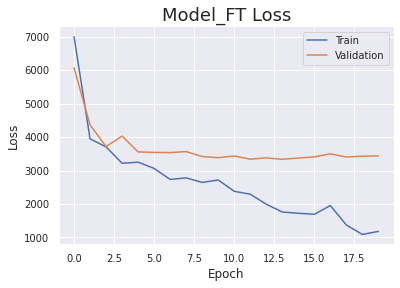

In [114]:
#entreno de nuevo

# como entrenariamos normalmente
H_cnn_hp = model_cnn_hp.fit(X_train_resized, Y_train,
          batch_size=batch_size,
          validation_split=0.2,
          epochs=20)

# Evaluamos el modelo
print("[INFO]: Evaluando red neuronal...")
pred_hp = model_cnn_hp.predict(X_test_resized, batch_size=128)  #(X)

model_cnn_hp.summary()

#grafico
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
plt.plot(H_cnn_hp.history['loss'], label='Train')
plt.plot(H_cnn_hp.history['val_loss'], label='Validation')
plt.title('Model_FT Loss', fontsize=18)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right', fontsize=10)
sns.despine()
plt.show()

In [115]:
# comprobamos el loss en el test set
scores = model_cnn_hp.evaluate(X_test_resized, Y_test, verbose=1)
print('Test loss:', scores[0])


5/5 [==============================] - 1s 122ms/step - loss: 2642.9424 - mse: 2642.9424
Test loss: 2642.9423828125


In [116]:
#calculo el mse y el mae del modelo
max_Y = Y_train.max()
pred_lm_denorm = pred_hp
y_test_denorm = y_test * max_Y

rmse = mean_squared_error(y_true  = y_test_denorm, y_pred  = pred_lm_denorm,squared = False)
print(f"El error cuadrático medio (rmse) de test es: {rmse}")

mae = mean_absolute_error(y_test_denorm, pred_lm_denorm)
print(f"El error aboluto(mae) de test es: {mae}")


El error cuadrático medio (rmse) de test es: 51.40955223578707
El error aboluto(mae) de test es: 32.24975412706785


Hyperopt me mejora el mse, a costa de empeorar el mae. Siguen siendo unos valores altos de error.

## Modelo híbrido

In [117]:
#remember de mis datos
#x_train, train normalizado
#x_test, test normalizado

#y_train, etiquetas norm
#y_test, etiquetas norm

#X_train_resized, imagenes norm
#X_test_resized, imagenes norm

In [118]:
!pip install -q keras

In [119]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [120]:
# importar los paquetes necesarios
import tensorflow as tf
from tensorflow import keras
from keras.layers import BatchNormalization
from keras.layers import concatenate
from keras.layers import Input, concatenate
from keras.models import Model
from keras.optimizers import Adam
import cv2 
import imutils
#from pyimagesearch import datasets
#from pyimagesearch import models
import argparse
import locale
import os

##### Modelo híbrido básico 

In [121]:
np.random.seed(42)
#Inputs MLP
inputs_mlp = Input(shape=(9,))
x_mlp1 = Dense(9, activation='relu', bias_initializer='zeros')(inputs_mlp)
x_mlp2 = Dense(3, activation='relu')(x_mlp1)


#Imputs CNN
#inputs_cnn = Input(shape=(224, 224, 3))
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
  if layer.name == 'block5_conv1':
    break
  layer.trainable = False
# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output
x1 = Conv2D(9, (3,3), activation='relu')(last)
x2 = MaxPooling2D(pool_size=(2,2)) (x1)  #aquí dejo mis 9 neuronas a 3
x3 = Flatten()(x2) #paso a vector

In [122]:
#concat of inputs
combinedInput = concatenate([x_mlp2,x3])
# output 
output = Dense (1, activation='linear') (combinedInput)

In [123]:
#Definir el modelo
model_hib= Model(inputs=[inputs_mlp, base_model.input], outputs=output)


In [124]:
#optimizador
opt = Adam(lr=1e-3, decay=1e-3 / 20)

# Compilación del modelo
model_hib.compile(loss='mse', optimizer=opt)

In [125]:
# train the model
H_hib= model_hib.fit([X_train_norm, X_train_resized], y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
4/4 [==============================] - 4s 806ms/step - loss: 0.4548 - val_loss: 0.1607
Epoch 2/20
4/4 [==============================] - 3s 678ms/step - loss: 0.4764 - val_loss: 0.1021
Epoch 3/20
4/4 [==============================] - 3s 687ms/step - loss: 0.1627 - val_loss: 0.1056
Epoch 4/20
4/4 [==============================] - 3s 706ms/step - loss: 0.1044 - val_loss: 0.0995
Epoch 5/20
4/4 [==============================] - 3s 710ms/step - loss: 0.0975 - val_loss: 0.0916
Epoch 6/20
4/4 [==============================] - 3s 705ms/step - loss: 0.0891 - val_loss: 0.0832
Epoch 7/20
4/4 [==============================] - 3s 714ms/step - loss: 0.0804 - val_loss: 0.0747
Epoch 8/20
4/4 [==============================] - 3s 714ms/step - loss: 0.0719 - val_loss: 0.0664
Epoch 9/20
4/4 [==============================] - 3s 713ms/step - loss: 0.0637 - val_loss: 0.0588
Epoch 10/20
4/4 [==============================] - 3s 731ms/step - loss: 0.0561 - val_loss: 0.0517
Epoch 11/20
4/4 [==

[INFO] predicting house prices...


5/5 [==============================] - 1s 125ms/step
0.08273742573723117
Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_16[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                  

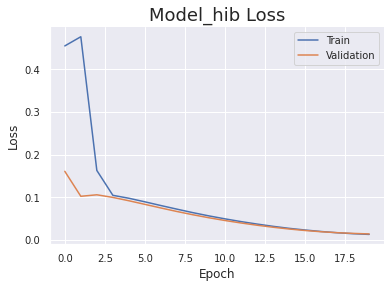

In [126]:
# make predictions on the testing data
print("[INFO] predicting house prices...")
preds_hib= model_hib.predict([x_test, X_test_resized])

diff = preds_hib.flatten() - y_test
percentDiff = (diff / y_test) * 100
absPercentDiff = np. abs(diff)
print(absPercentDiff.mean())

model_hib.summary()

#grafico
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
plt.plot(H_hib.history['loss'], label='Train')
plt.plot(H_hib.history['val_loss'], label='Validation')
plt.title('Model_hib Loss', fontsize=18)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right', fontsize=10)
sns.despine()
plt.show()

In [127]:
print('mean: ', np.mean(absPercentDiff))
print('desviación standard: ', np.std(absPercentDiff))


mean:  0.08273742573723117
desviación standard:  0.06500238019326465


In [128]:
#desnormalizo el resultado para ver el precio en eur en lo que nos estamos confundiendo
pred_desnorm=preds_hib*max_Y

diff = list(flatten(pred_desnorm)) - (y_test*max_Y)
absPercentDiff = np. abs(diff)
print("El error medio en EUR",absPercentDiff.mean())


El error medio en EUR 57.916198160829424


In [129]:
#calculo el mse y el mae del modelo
max_Y = Y_train.max()
pred_hib_denorm = preds_hib
y_test_denorm = y_test * max_Y

rmse = mean_squared_error(y_true  = y_test_denorm, y_pred  = pred_hib_denorm,squared = False)
print(f"El error cuadrático medio (rmse) de test es: {rmse}")

mae = mean_absolute_error(y_test_denorm, pred_hib_denorm)
print(f"El error aboluto(mae) de test es: {mae}")


El error cuadrático medio (rmse) de test es: 86.468692112509
El error aboluto(mae) de test es: 68.40534672176442


#### Los valores son muy malos, voy a ver que resultados me da usando flatten como en mi CNN

In [130]:
np.random.seed(42)
#Inputs MLP
inputs_mlp1 = Input(shape=(9,)) 
x1_mlp1 = Dense(9, activation='relu',kernel_initializer='random_uniform', bias_initializer='zeros')(inputs_mlp)
x1_mlp2 = Dense(3, activation='relu')(x1_mlp1)

#Imputs CNN
base_model1 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model1.layers:
  if layer.name == 'block5_conv1':
    break
  layer.trainable = False
# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model1.layers[-1].output
x1 = Flatten()(last)
x2 = Dense(9, activation='relu')(x1)
x3 = Dense(5, activation='relu', name='fc1')(x2)
x4 = Dropout(0.3)(x3)
x5 = Dense(3, activation='relu')(x4)

In [131]:
#concat of inputs
combinedInput1 = concatenate([x1_mlp2,x5])
# output 
output1 = Dense (1, activation='linear') (combinedInput1)

#Definir el modelo
model_hib1= Model(inputs=[inputs_mlp, base_model1.input], outputs=output1)


In [132]:
#optimizador
opt1 = Adam(lr=1e-3, decay=1e-3 / 20)

# Compilación del modelo
model_hib1.compile(loss='mse', optimizer=opt1)

In [133]:
# train the model
H_hib1= model_hib1.fit([X_train_norm, X_train_resized], y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
4/4 [==============================] - 4s 777ms/step - loss: 0.0517 - val_loss: 0.0171
Epoch 2/20
4/4 [==============================] - 3s 674ms/step - loss: 0.0119 - val_loss: 0.0110
Epoch 3/20
4/4 [==============================] - 3s 678ms/step - loss: 0.1106 - val_loss: 0.0087
Epoch 4/20
4/4 [==============================] - 3s 685ms/step - loss: 0.0207 - val_loss: 0.0151
Epoch 5/20
4/4 [==============================] - 3s 685ms/step - loss: 0.0192 - val_loss: 0.0180
Epoch 6/20
4/4 [==============================] - 3s 700ms/step - loss: 0.0127 - val_loss: 0.0150
Epoch 7/20
4/4 [==============================] - 3s 712ms/step - loss: 0.0152 - val_loss: 0.0177
Epoch 8/20
4/4 [==============================] - 3s 714ms/step - loss: 0.0158 - val_loss: 0.0173
Epoch 9/20
4/4 [==============================] - 3s 696ms/step - loss: 0.0154 - val_loss: 0.0169
Epoch 10/20
4/4 [==============================] - 3s 689ms/step - loss: 0.0149 - val_loss: 0.0164
Epoch 11/20
4/4 [==

[INFO] predicting house prices...
5/5 [==============================] - 1s 118ms/step
0.06358639543852473
Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_18[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][

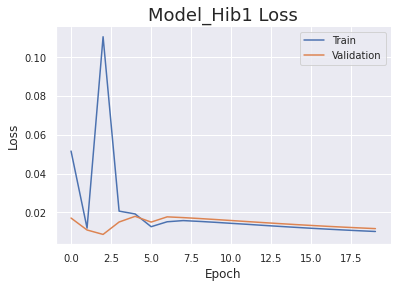

In [134]:
# make predictions on the testing data
print("[INFO] predicting house prices...")
preds_hib1= model_hib1.predict([x_test, X_test_resized])

diff1 = preds_hib1.flatten() - y_test
percentDiff1 = (diff1 / y_test) * 100
absPercentDiff1 = np. abs(diff1)
print(absPercentDiff1.mean())

model_hib1.summary()

#grafico
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
plt.plot(H_hib1.history['loss'], label='Train')
plt.plot(H_hib1.history['val_loss'], label='Validation')
plt.title('Model_Hib1 Loss', fontsize=18)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right', fontsize=10)
sns.despine()
plt.show()

In [135]:
print('mean: ', np.mean(absPercentDiff1))
print('desviación standard: ', np.std(absPercentDiff1))


mean:  0.06358639543852473
desviación standard:  0.0744639695999355


In [136]:
#desnormalizo el resultado para ver el precio en eur en lo que nos estamos confundiendo
pred_desnorm1=preds_hib1*max_Y

diff1 = list(flatten(pred_desnorm1)) - (y_test*max_Y)
absPercentDiff1 = np. abs(diff1)
print("El error medio en EUR",absPercentDiff1.mean())


El error medio en EUR 44.5104768246035


#### He obtenido mejores resultados utilizando densas y añadiento un dropout, ya que el maxpooling lo lleva el VGG16, creo que es más óptimo usar Dropout entre las densas. Puedo mejorar los resultados haciendo data aumentation. Probaré utilizando la sigmoide como capa de salida. 